# Algorytmy wyszukiwania wzorca w tekście

## Algorytm naiwny

In [68]:
def naive_string_matching(text, pattern):
    res = []
    for s in range(len(text) - len(pattern) + 1):
        if pattern == text[s : s + len(pattern)]:
            res.append(s)
    
    return res

### Złożoności czasowe algorytmu naiwnego
$n$ - długość tekstu, $m$ - długość wzorca\
Czas preprocessingu: 0\
Czas dopasowania: $O((n - m + 1) * m)$\
Całkowita złożoność czasowa algorytmu: $O((n - m + 1) * m)$

## Algorytm automatu skończonego

In [72]:
def fa_string_matching(text, pattern, delta = None):
    if delta is None:
        delta = transition_table(text, pattern)
    q = 0
    res = []
    length = len(delta) - 1
    for i in range(len(text)):
        q = delta[q][text[i]]
        if q == length:
            res.append(i + 1 - q)
    
    return res

### Algorytm generujące tabelę przejść

In [84]:
def transition_table(text, pattern):
    sigma = {}
    for char in text:
        sigma[char] = None
        
    res = []
    for q in range(len(pattern) + 1):
        res.append({})
        for a in sigma:
            k = min(len(pattern) + 1, q + 2)
            while True:
                k -= 1
                if k == 0 or pattern[:k] == (pattern[:q] + a)[-k:]:
                    break
            res[q][a] = k
            
    return res

## Złożoności czasowe algorytmu automatu skończonego
$n$ - długość tekstu, $m$ - długość wzorca, $\Sigma$ - alfabet, skończony zbiór znaków\
Czas preprocessingu: $O(m^3 * |\Sigma|)$\
Czas dopasowania: $O(n)$\
Całkowita złożoność czasowa algorytmu: $O(n + m^3 * |\Sigma|)$

## Algorytm KMP

In [28]:
def kmp_string_matching(text, pattern, pi = None):
    res = []
    if pi is None:
        pi = prefix_function(pattern)
    q = 0
    for i in range(len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q - 1]
        if pattern[q] == text[i]:
            q = q + 1
        if q == len(pattern):
            res.append(i + 1 - q)
            q = pi[q-1]
    
    return res

### Funkcja prefiksowa

In [8]:
def prefix_function(pattern):
    pi = [0]
    k = 0
    for q in range(1, len(pattern)):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k - 1]
        if pattern[k] == pattern[q]:
            k += 1
        pi.append(k)
    return pi

## Złożoności obliczeniowe algorytmu KMP
$n$ - długość tekstu, $m$ - długość wzorca\
Czas preprocessingu: $O(m)$\
Czas dopasowania: $O(n)$\
Całkowita złożoność czasowa algorytmu: $O(n + m), m \leqslant n \implies O(n + m) = O(n)$

## Test cases

In [234]:
tests = [["a" * 100000, "a"], ["abcdef" * 1000, "abcdef" * 100], ["aaaaaaaa" * 800 + "b", "aaaaaaaa" * 400 + "b"],
        ["\/*123./.\." * 100000, "123"], ["&" * 250000, "&" * 10000]]

### Funkcja testująca

In [235]:
from time import time
import matplotlib.pyplot as plt
import numpy as np

def time_test(f, text, pattern, delta = None, pi = None):
    start = time()
    if pi is not None:
        f(text, pattern, pi = pi)
    elif delta is not None:
        f(text, pattern, delta = delta)
    else:
        f(text, pattern)
    
    return round(time() - start, 5)
    
    
tests_dict = {}
for i in range(len(tests)):
    tests_dict[f"Test: {i + 1}"] = []
    
for i, test in enumerate(tests):
    text, pattern = test
    tests_dict[f"Test: {i + 1}"].append(time_test(naive_string_matching, text, pattern))
    tests_dict[f"Test: {i + 1}"].append(time_test(fa_string_matching, text, pattern))
    tests_dict[f"Test: {i + 1}"].append(time_test(kmp_string_matching, text, pattern))

### Test 1

Naive: 0.025 s, FA: 0.03199 s, KMP: 0.04801 s


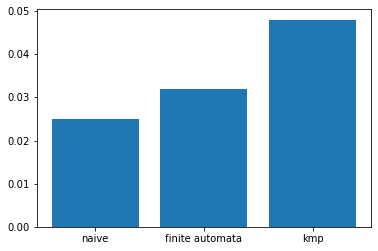

In [250]:
print(f"Naive: {tests_dict['Test: 1'][0]} s, FA: {tests_dict['Test: 1'][1]} s, KMP: {tests_dict['Test: 1'][2]} s")
plt.bar([0, 1, 2], tests_dict["Test: 1"], align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

Dane dla Testu 1: text = "a" * 100000, pattern = "a".\
Dla danych z tego testu w każdym z podanych algorytmów złożoność czasowa wynosi $O(n)$, ale jak możemy zauważyć algorytm naiwny okazał się najszybszy, dzięki temu, że jest on najprostszy, co przekłada się na mniejszą stałą czasową, która zanika w notacji Big O.

### Test 2

Naive: 0.00199 s, FA: 0.519 s, KMP: 0.003 s


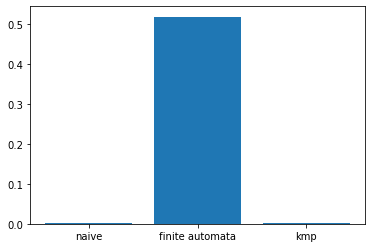

In [251]:
print(f"Naive: {tests_dict['Test: 2'][0]} s, FA: {tests_dict['Test: 2'][1]} s, KMP: {tests_dict['Test: 2'][2]} s")
plt.bar([0, 1, 2], tests_dict["Test: 2"], align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

Dane dla Testu 2: text = "abcdef" * 1000, pattern = "abcdef" * 100.\
W tym teście możemy zauważyć, że wzorzec jest stosunkowo duży w porównaniu do całego textu $\approx 10 \%$. Z tego powodu algorytm automatu skończonego w tym przypadku wykonuje się bardzo długo, gdyż znaczną większość tego czasu konsumuje czas preprocessingu, wynoszący $O(m^3 * |\Sigma|)$.

### Test 3

Naive: 0.002 s, FA: 5.83801 s, KMP: 0.005 s


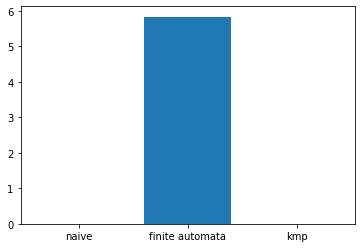

In [252]:
print(f"Naive: {tests_dict['Test: 3'][0]} s, FA: {tests_dict['Test: 3'][1]} s, KMP: {tests_dict['Test: 3'][2]} s")
plt.bar([0, 1, 2], tests_dict["Test: 3"], align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

Dane dla Testu 3: text = "aaaaaaaa" * 800 + "b", pattern = "aaaaaaaa" * 400 + "b".\
Dla testu 3 możemy zauważayć taką samą zależność jak w przypadku testu 2. Porównajmy jednak wielkości różnic pomiędzy czasami wykonania z testu 2. W tym teście wzorzec ma długość $\approx 50 \%$ długości tekstu, a czas wykonania jest gorszy ponad 1000 razy od pozostałych algorytmów. Dla testu 2 $m \approx 10 \% * n$, co daje złożość czasową gorszą o ponad 100 razy.

### Test 4

Naive: 0.27999 s, FA: 0.222 s, KMP: 0.329 s


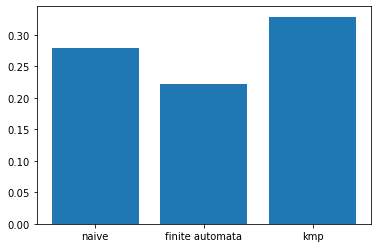

In [253]:
print(f"Naive: {tests_dict['Test: 4'][0]} s, FA: {tests_dict['Test: 4'][1]} s, KMP: {tests_dict['Test: 4'][2]} s")
plt.bar([0, 1, 2], tests_dict["Test: 4"], align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

Dane dla Testu 4: text = "\/*123./.\." * 100000, pattern = "123".\
W teście 4 widzimy, że dla stosunkowo krótkiego wzorca w porównaniu do głównego textu i małego alfabetu $|\Sigma| = 7$ algorytm automatu skończonego wykonał się najszybicej, gdyż czas preprocessingu zajął mąłą cześć całkowitego czasu wykonania ze względu na ustalone parametry. Naiwny algorytm zajął porównalną ilość czasu, przy stosunkowo małych wartościach m algorytm ten jest linowy ze względu na długość tekstu. Algorytm KMP okazał się w tym przypadku najgorszy, prawdopodobnie ze względu na większą stałą czasową jaką jest obarczony ten algortym.

### Test 5

Naive: 0.26601 s, FA: 0.10699 s, KMP: 0.154 s


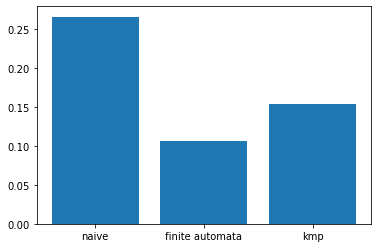

In [254]:
print(f"Naive: {tests_dict['Test: 5'][0]} s, FA: {tests_dict['Test: 5'][1]} s, KMP: {tests_dict['Test: 5'][2]} s")
plt.bar([0, 1, 2], tests_dict["Test: 5"], align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

Dane dla Testu 5: text = "&" * 250000, pattern = "&" * 10000.\
Test 5 został tak zbudowany, aby pokazać sytuacje, w których algorytm naiwny zawodzi w porównaniu do reszty przedstawionych algorytmów. Dzieje się tak, gdyż prawie dla każdego znaku w tekście zostanie wykonanie porównanie napisów o długości wzorca, co znacznie pogarsza czas wykonania. Dla takich danych, czyli alfabetu złożonego z bardzo małej ilości znaków i stosunkowo krótkiego wzorca w porównaniu do tekstu najlepszym wyborem jest algorytm automatu skończonego.

## Szukanie wzorca "art" w pierwszym pliku

### Otwieranie pliku

In [255]:
text1 = ""
pattern1 = "art"
with open("1997_714.txt", "r", encoding="utf-8") as f1:
    text1 = f1.read()

### Rysowanie wykresu

Naive: 0.059 s, FA: 0.047 s, KMP: 0.067 s


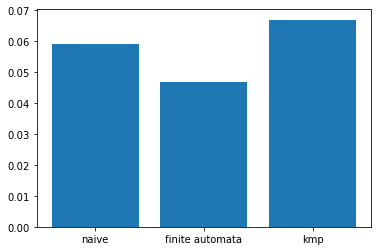

In [258]:
results = [time_test(naive_string_matching, text1, pattern1), time_test(fa_string_matching, text1, pattern1), time_test(kmp_string_matching, text1, pattern1)]
print(f"Naive: {results[0]} s, FA: {results[1]} s, KMP: {results[2]} s")
plt.bar([0, 1, 2], results, align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

## Szukanie wzorca "Ukraina" w drugim pliku

### Otwieranie pliku

In [259]:
text2 = ""
pattern2 = "Ukraina"
with open("passages-head.tsv", "r", encoding="utf-8") as f2:
    text2 = f2.read()

### Rysowanie wykresu

Naive: 19.82413 s, FA: 15.678 s, KMP: 20.86699 s


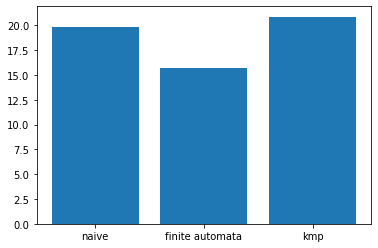

In [261]:
results = [time_test(naive_string_matching, text2, pattern2), time_test(fa_string_matching, text2, pattern2), time_test(kmp_string_matching, text2, pattern2)]
print(f"Naive: {results[0]} s, FA: {results[1]} s, KMP: {results[2]} s")
plt.bar([0, 1, 2], results, align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

## Zaproponowany tekst oraz wzorzec dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego.

Naive: 1.438 s, FA: 0.062 s, KMP: 0.14299 s


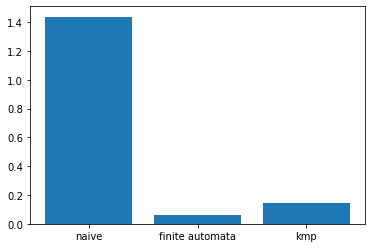

In [262]:
text3 = "aaaaaaaaaaaaaaaaaaaaaaaaaaaa" * 10000
pattern3 = "aaaaaaaaaaaaaaaaaaaaaaaaa" * 5000

results = [time_test(naive_string_matching, text3, pattern3), time_test(fa_string_matching, text3, pattern3, delta = transition_table(text3, pattern3)), time_test(kmp_string_matching, text3, pattern3, pi = prefix_function(pattern3))]
print(f"Naive: {results[0]} s, FA: {results[1]} s, KMP: {results[2]} s")
plt.bar([0, 1, 2], results, align = "center")
plt.xticks([0, 1, 2], ("naive", "finite automata", "kmp"))
plt.show()

## Zaproponowany wzorzec, dla którego zmierzony czas obliczenia tablicy przejścia automatu skończonego będzie co najmniej 5-krotnie dłuższy, niż czas potrzebny na utworzenie funkcji przejścia w algorytmie KMP.

FA table: 3.826 s, Prefix f.: 0.001 s


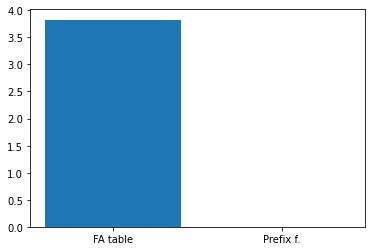

In [266]:
text4 = "fauisehfiuasehfioahseifhaisoefiushfiafadfads" * 25
pattern4 = "fauisehfiuasehfioahseifhaisoefiushfiafadfads" * 25

results = []
start = time()
transition_table(text4, pattern4)
results.append(round(time() - start, 5))

start = time()
prefix_function(pattern4)
results.append(round(time() - start, 5))


print(f"FA table: {results[0]} s, Prefix f.: {results[1]} s")
plt.bar([0, 1], results, align = "center")
plt.xticks([0, 1], ("FA table", "Prefix f."))
plt.show()